# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `Telco Customer Churn` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

**By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')

## Feature Understanding
*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GENDER
---------------


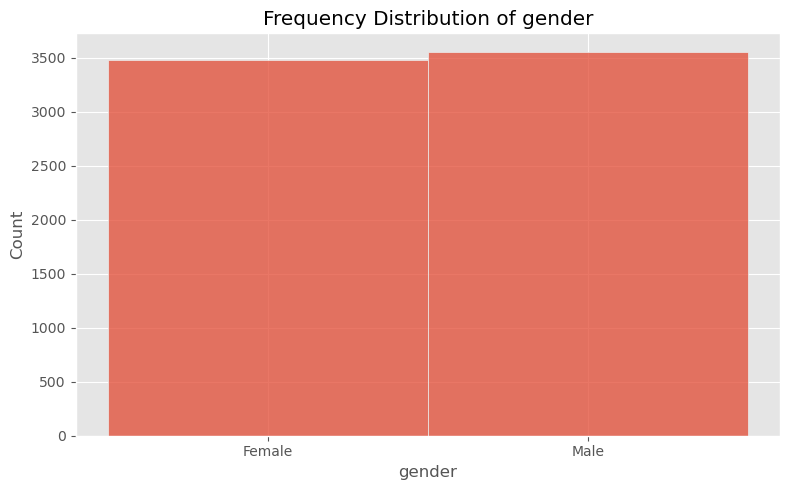


---------------
FEATURE: SENIORCITIZEN
---------------


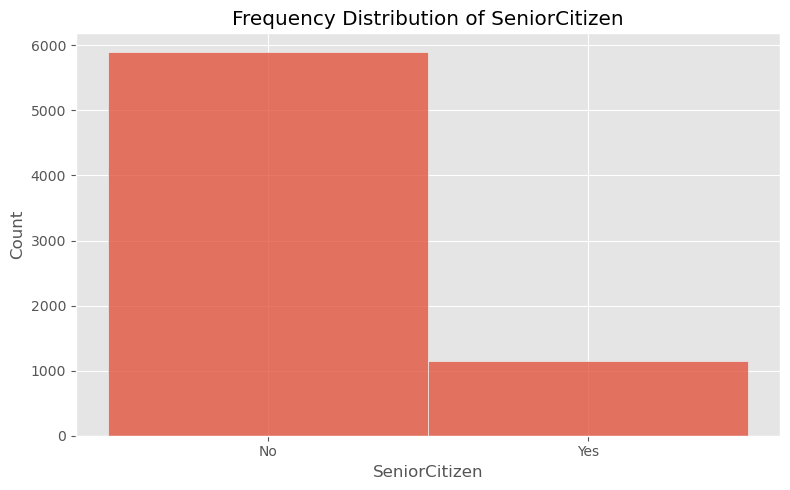


---------------
FEATURE: PARTNER
---------------


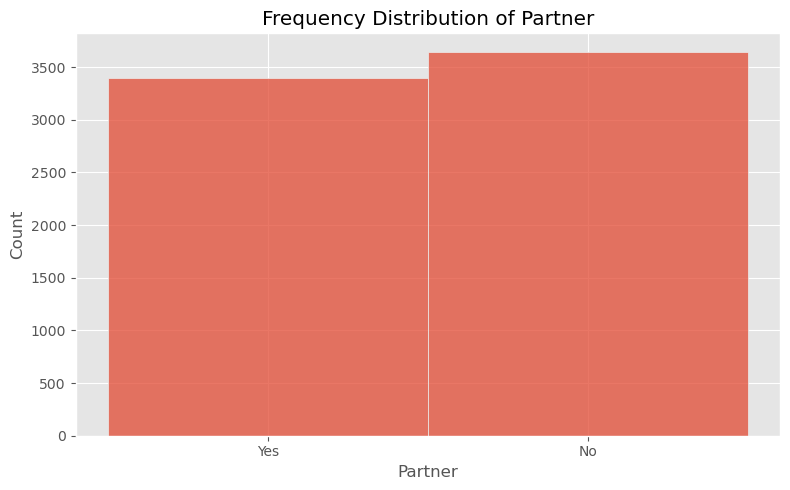


---------------
FEATURE: DEPENDENTS
---------------


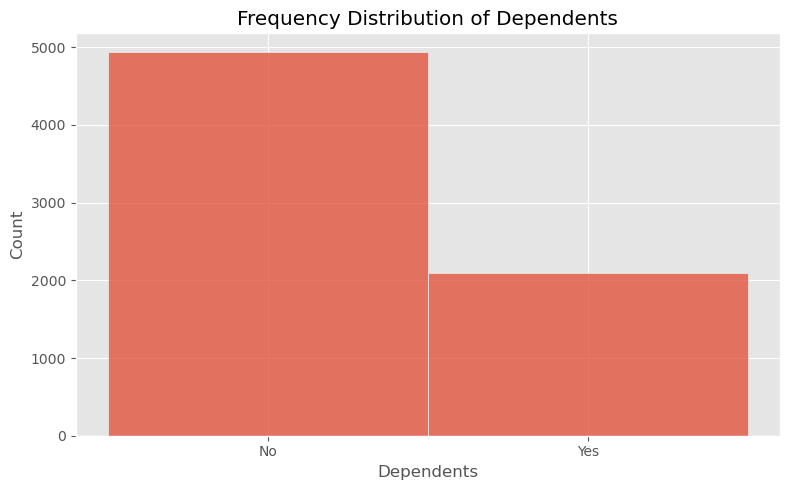


---------------
FEATURE: TENURE
---------------


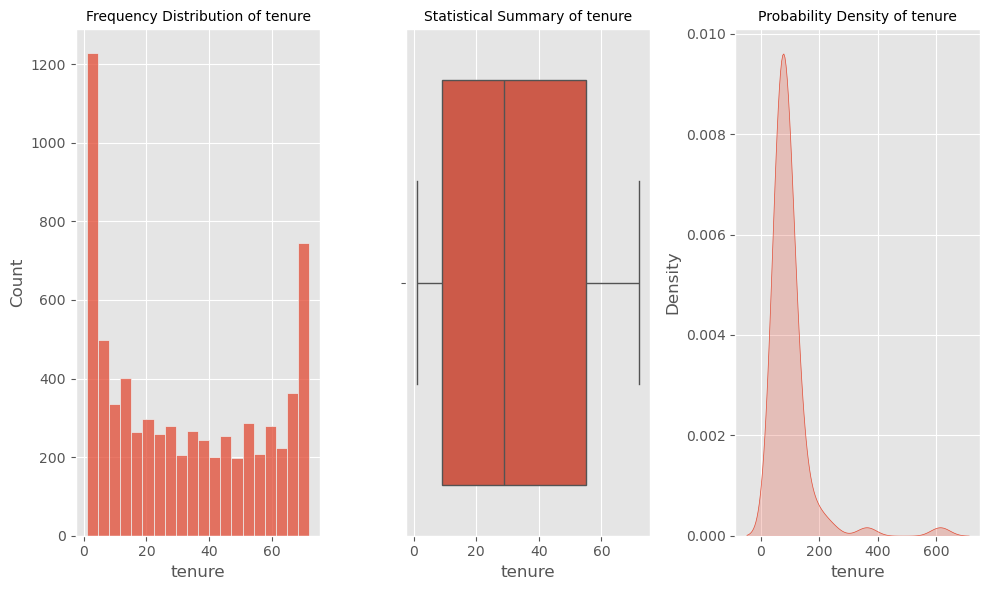


---------------
FEATURE: PHONESERVICE
---------------


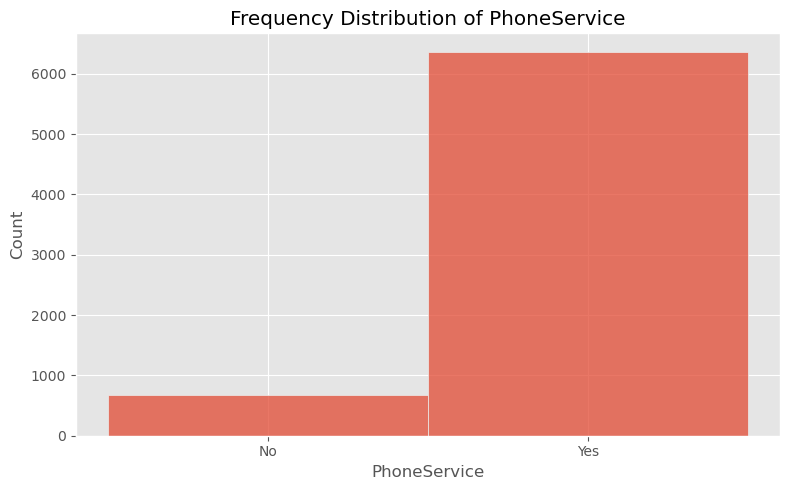


---------------
FEATURE: MULTIPLELINES
---------------


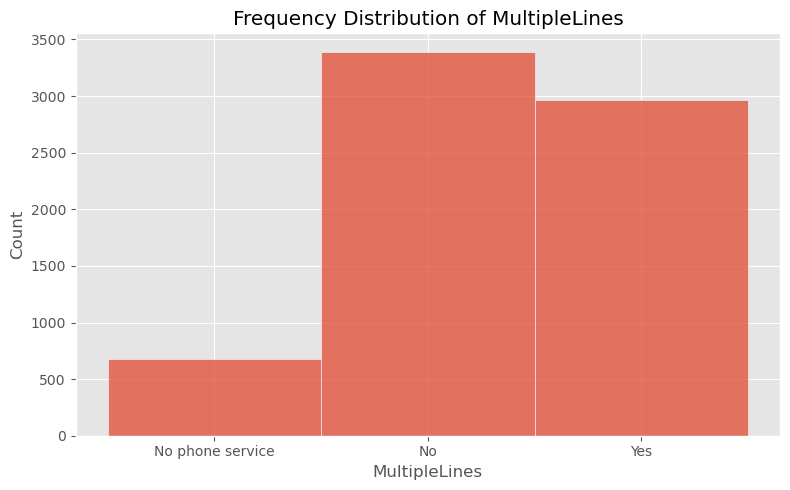


---------------
FEATURE: INTERNETSERVICE
---------------


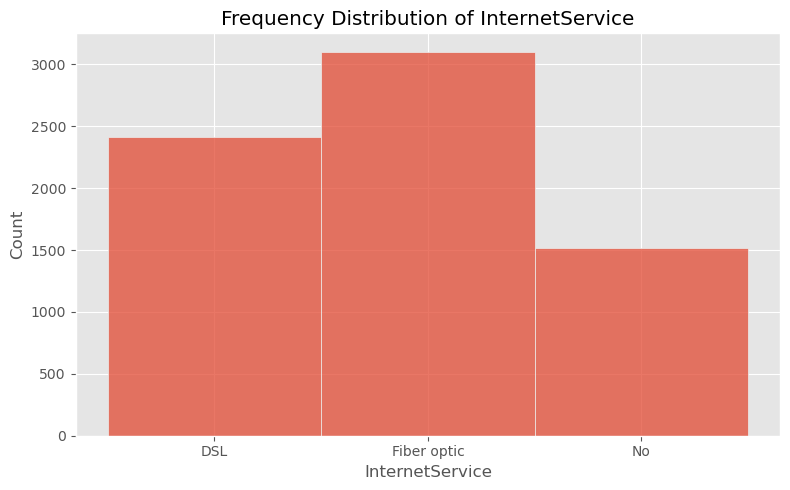


---------------
FEATURE: ONLINESECURITY
---------------


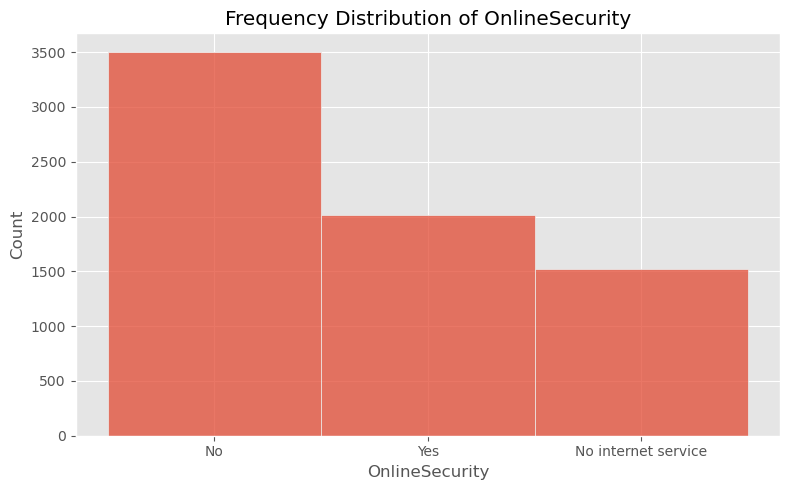


---------------
FEATURE: ONLINEBACKUP
---------------


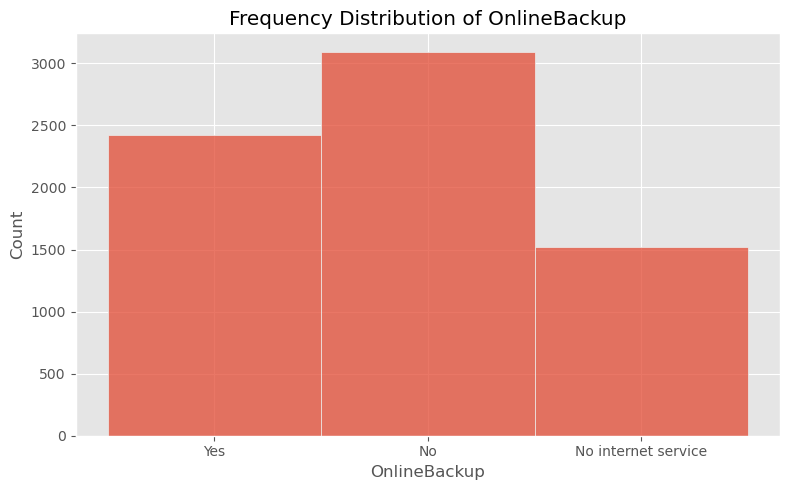


---------------
FEATURE: DEVICEPROTECTION
---------------


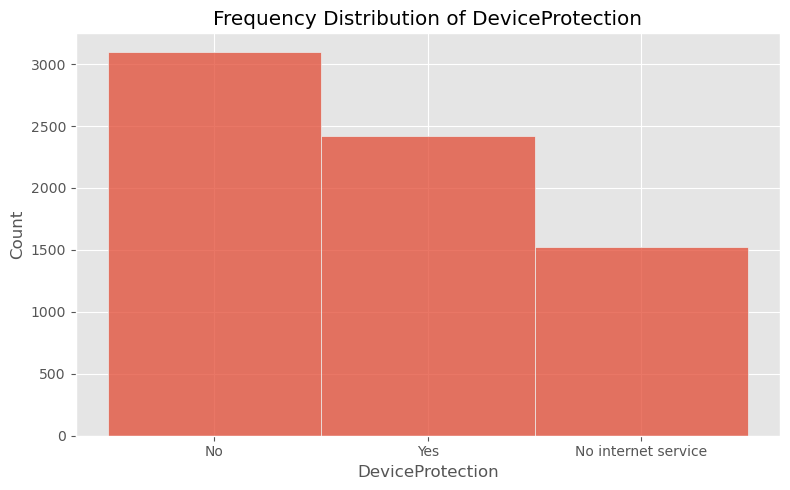


---------------
FEATURE: TECHSUPPORT
---------------


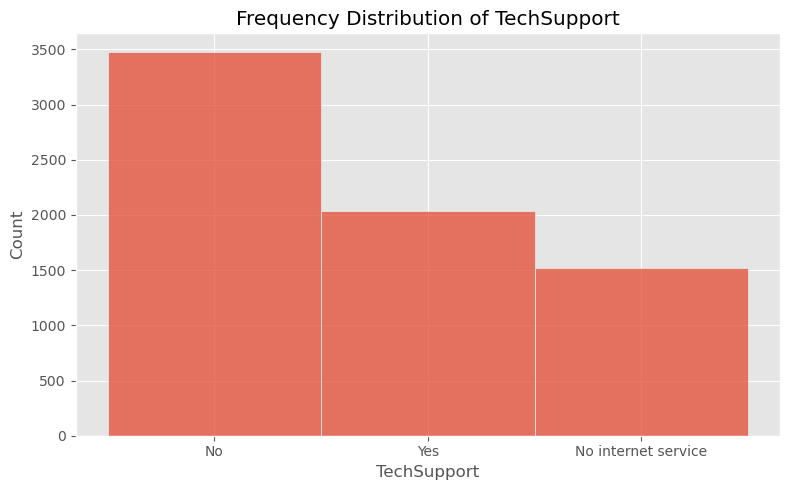


---------------
FEATURE: STREAMINGTV
---------------


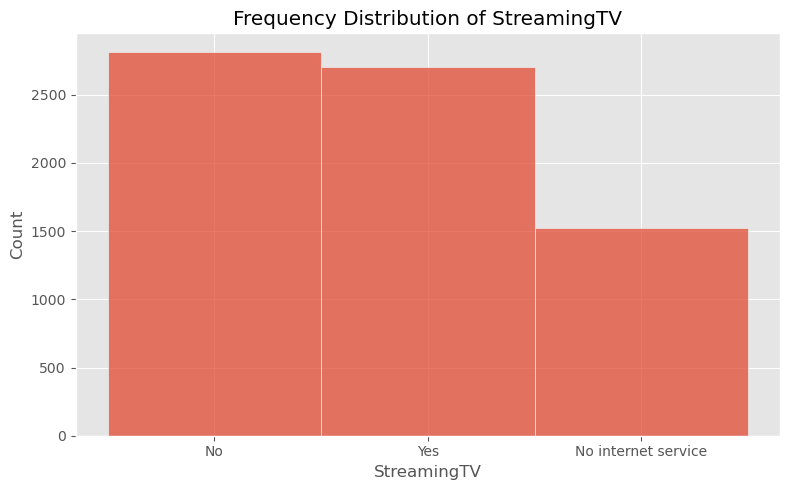


---------------
FEATURE: STREAMINGMOVIES
---------------


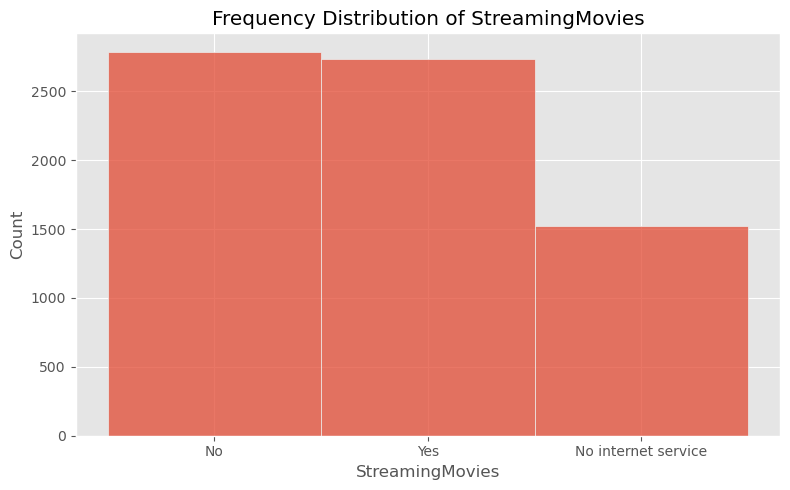


---------------
FEATURE: CONTRACT
---------------


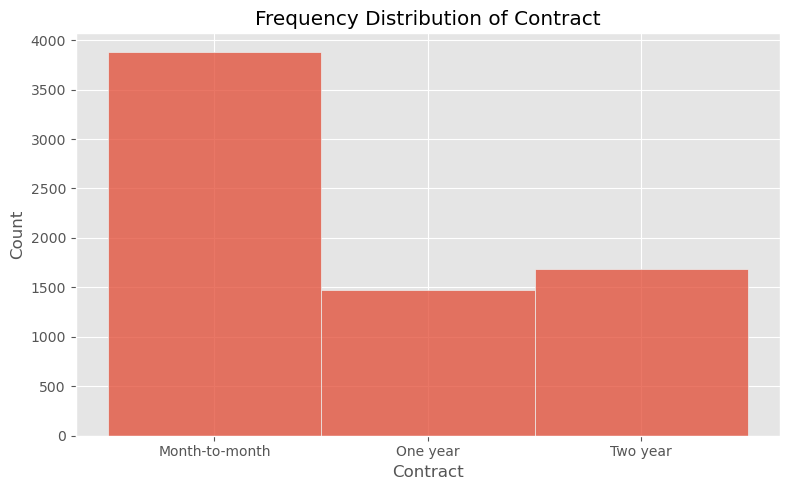


---------------
FEATURE: PAPERLESSBILLING
---------------


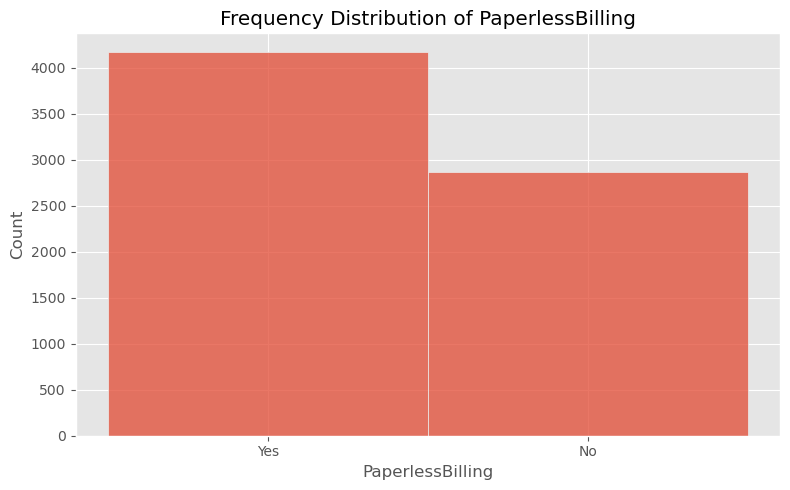


---------------
FEATURE: PAYMENTMETHOD
---------------


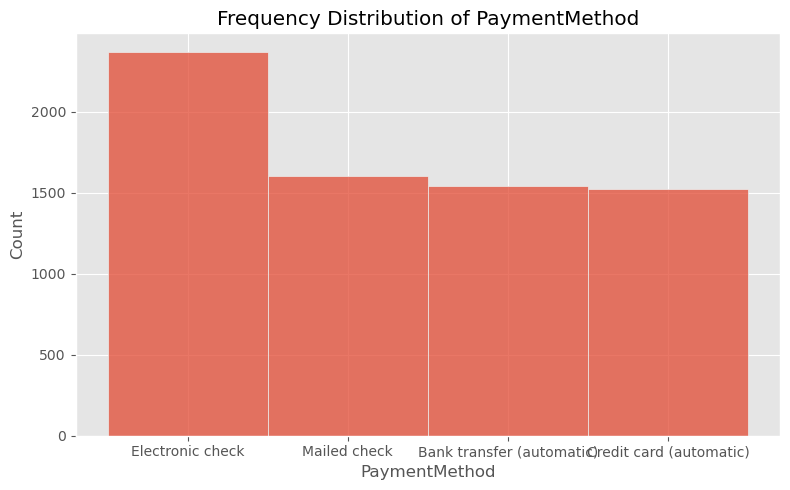


---------------
FEATURE: MONTHLYCHARGES
---------------


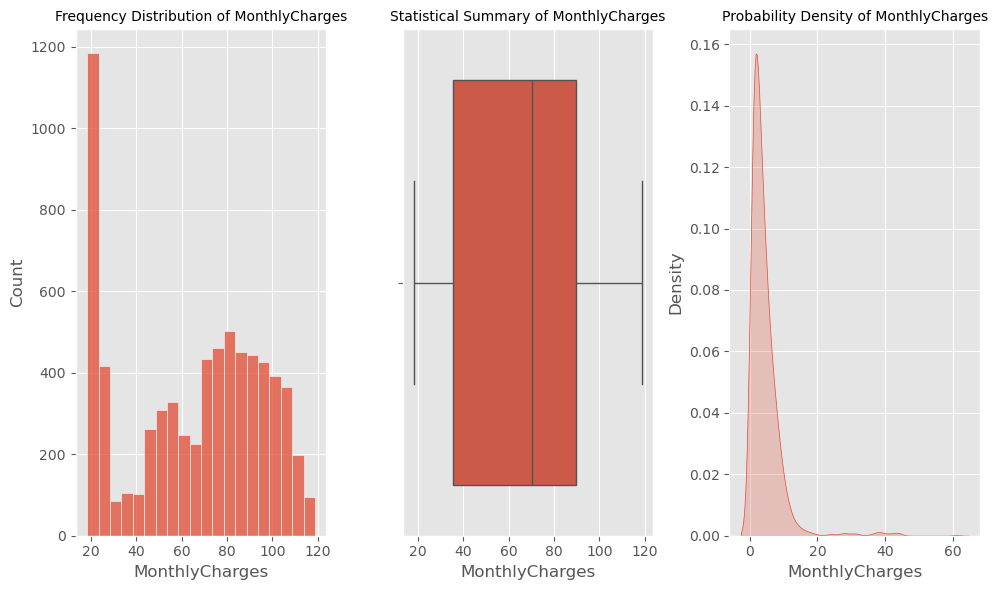


---------------
FEATURE: TOTALCHARGES
---------------


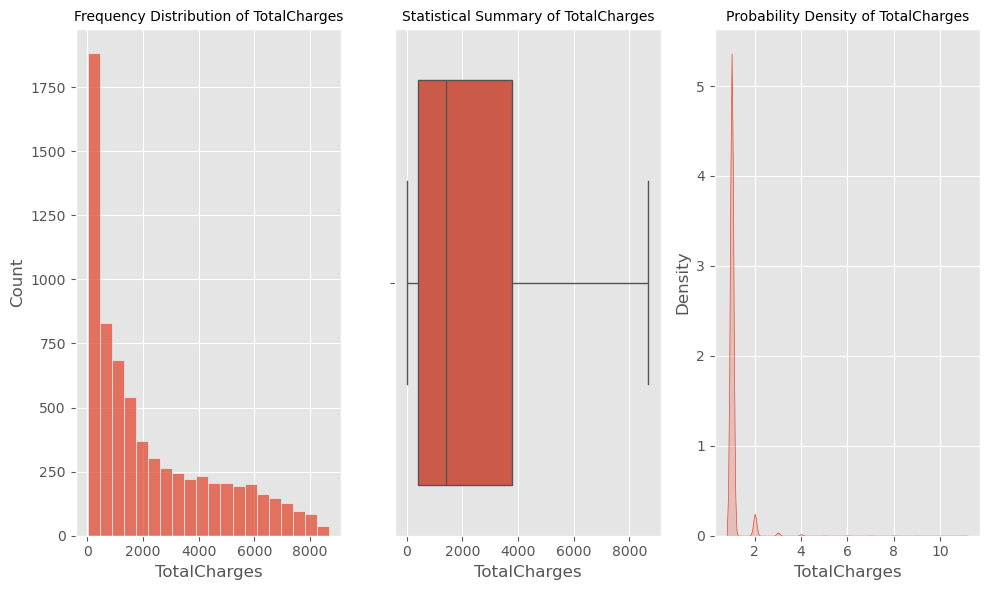


---------------
FEATURE: CHURN
---------------


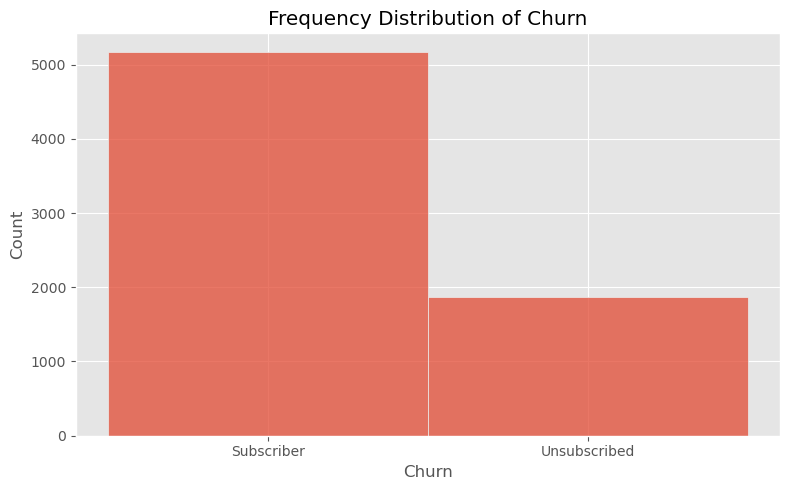

In [2]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 4:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, ax1 = plt.subplots(1, figsize=(8,5))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)

        plt.tight_layout()
        plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Groupby Comparisons

### Scatterplot of Target Feature

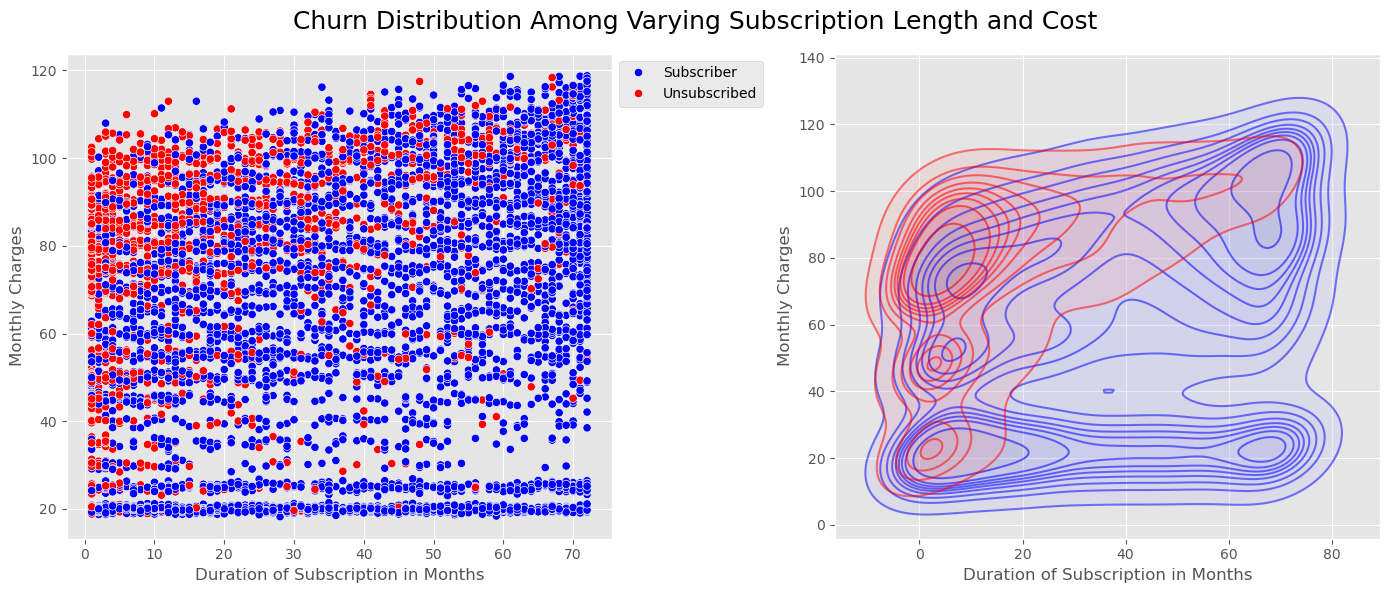

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Churn Distribution Among Varying Subscription Length and Cost', fontsize=18)
sns.scatterplot(ax=ax1, data=df, x='tenure', y='MonthlyCharges', hue='Churn', \
                palette={'Subscriber': 'blue', 'Unsubscribed':'red'})
ax1.set_xlabel('Duration of Subscription in Months')
ax1.set_ylabel('Monthly Charges')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')

sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', fill=True, alpha=0.25, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, legend=False)
sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, alpha=0.5, linewidth=1)
ax2.set_xlabel('Duration of Subscription in Months')
ax2.set_ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

### Correlation Heatmap

In [4]:
df_ordinal = df[['Churn','tenure','MonthlyCharges','TotalCharges']]
df_ordinal['Churn'] = df['Churn'].str.strip().replace('Subscriber',0).replace('Unsubscribed',1)
df_ordinal.tail()

,Churn,tenure,MonthlyCharges,TotalCharges
7027,0,24,84.80,"1,990.50"
7028,0,72,103.20,"7,362.90"
7029,0,11,29.60,346.45
7030,1,4,74.40,306.60
7031,0,66,105.65,"6,844.50"


In [5]:
correlation_matrix = df_ordinal.corr()
correlation_matrix

,Churn,tenure,MonthlyCharges,TotalCharges
Churn,1.00,-0.35,0.19,-0.20
tenure,-0.35,1.00,0.25,0.83
MonthlyCharges,0.19,0.25,1.00,0.65
TotalCharges,-0.20,0.83,0.65,1.00


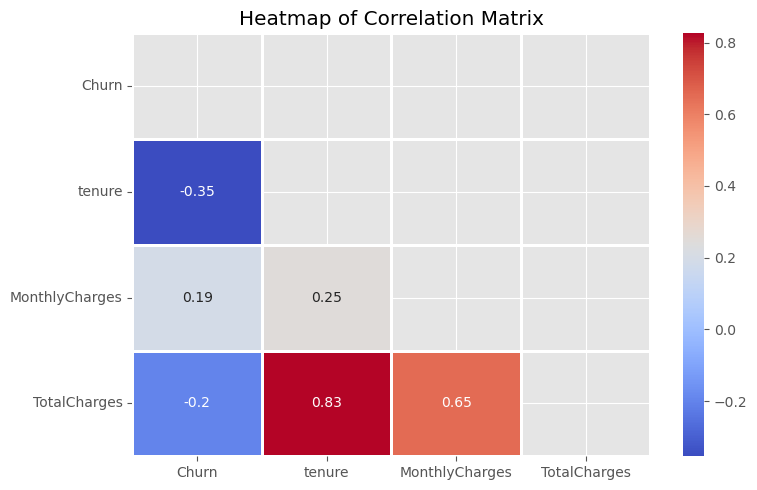

In [6]:
fig, ax = plt.subplots(1, figsize=(8,5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=2)
ax.set_title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

### Pairplot Relationships

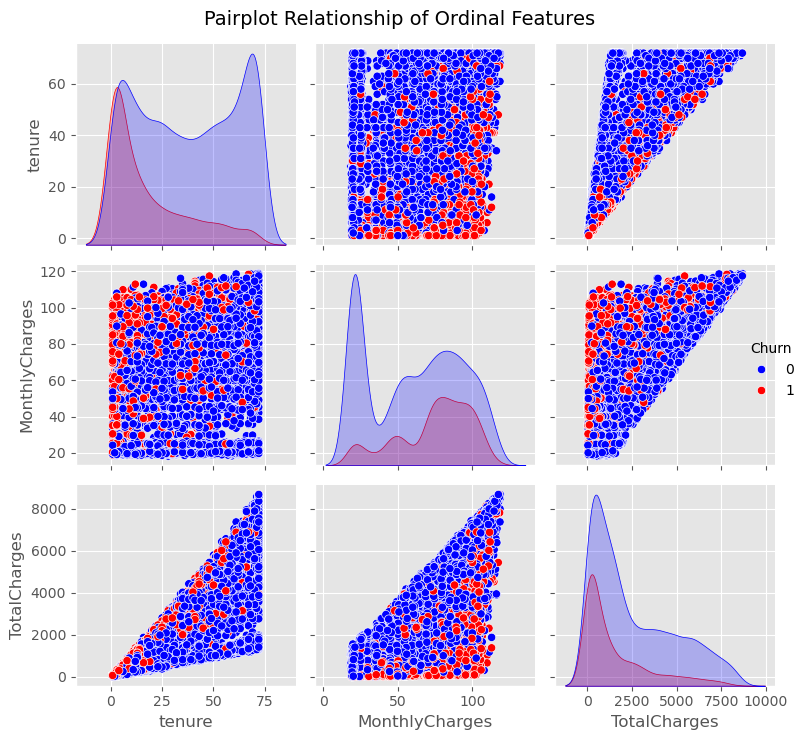

In [7]:
sns.pairplot(data=df_ordinal, hue='Churn', palette={0:'blue', 1:'red'})
plt.suptitle('Pairplot Relationship of Ordinal Features', fontsize=14)
plt.tight_layout()
plt.show()

### Groupby Comparisons

In [8]:
df_nominal = df[[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]


---------------
FEATURE: GENDER
---------------


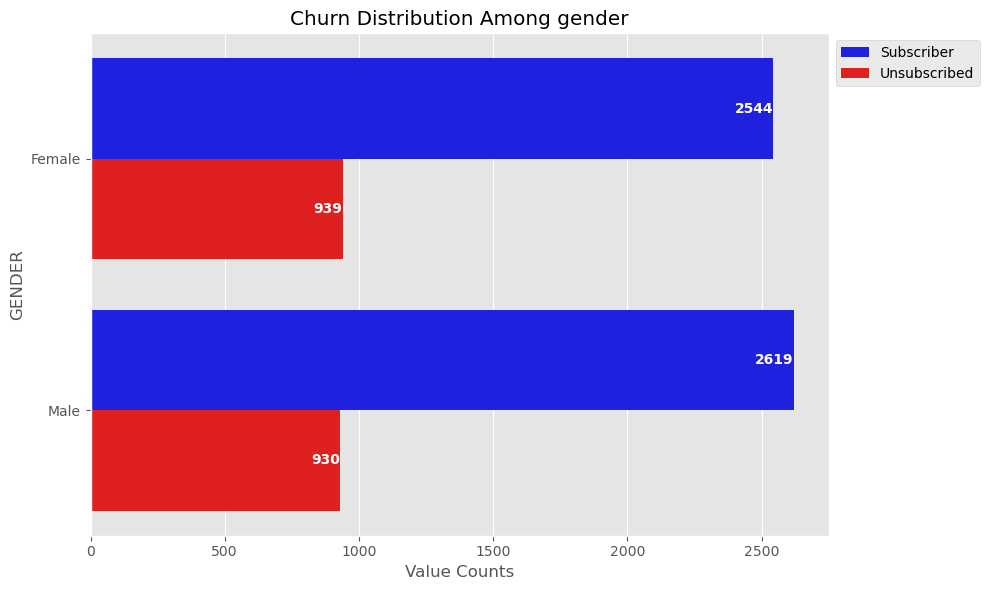


---------------
FEATURE: SENIORCITIZEN
---------------


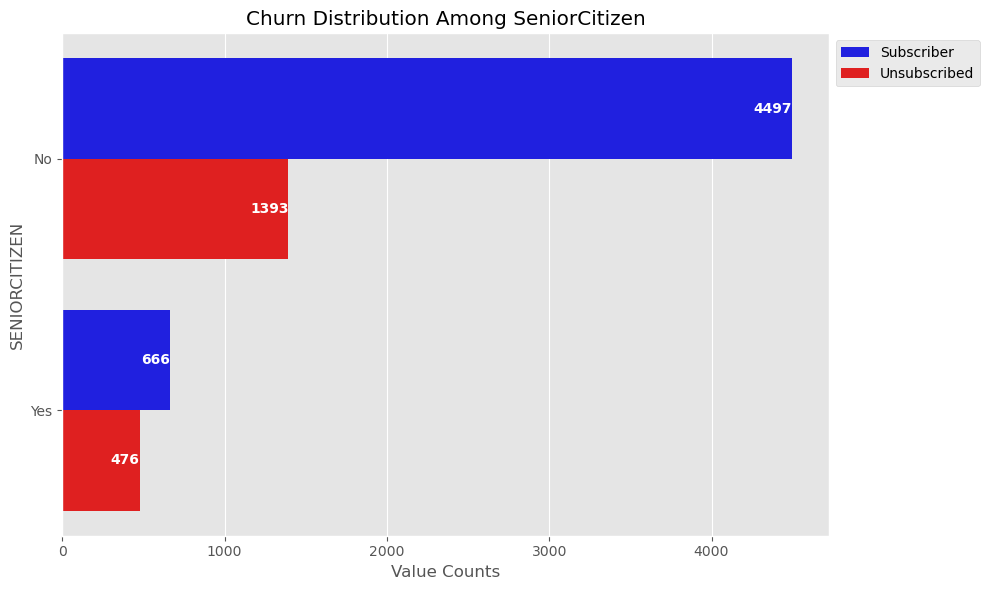


---------------
FEATURE: PARTNER
---------------


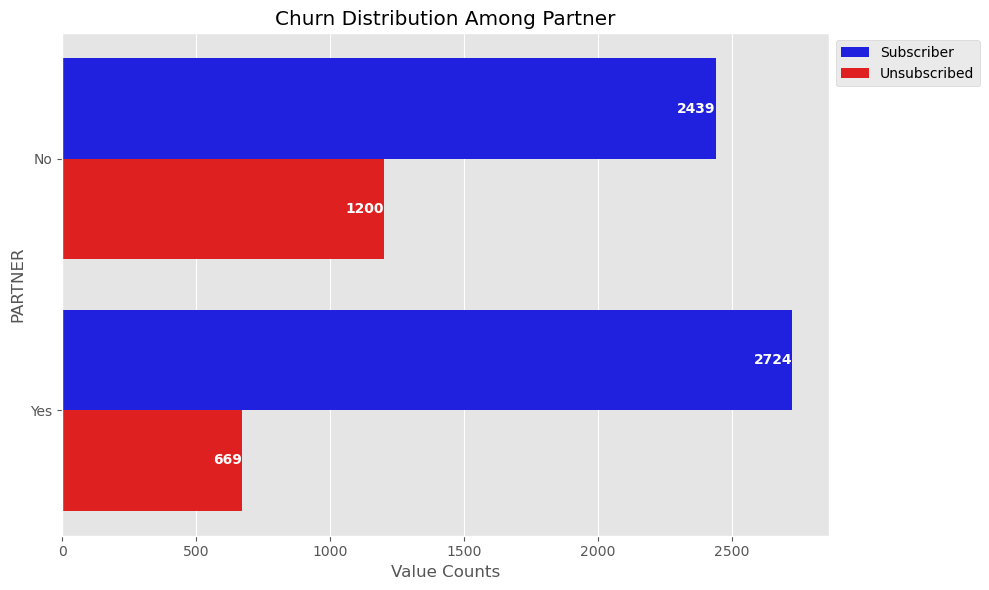


---------------
FEATURE: DEPENDENTS
---------------


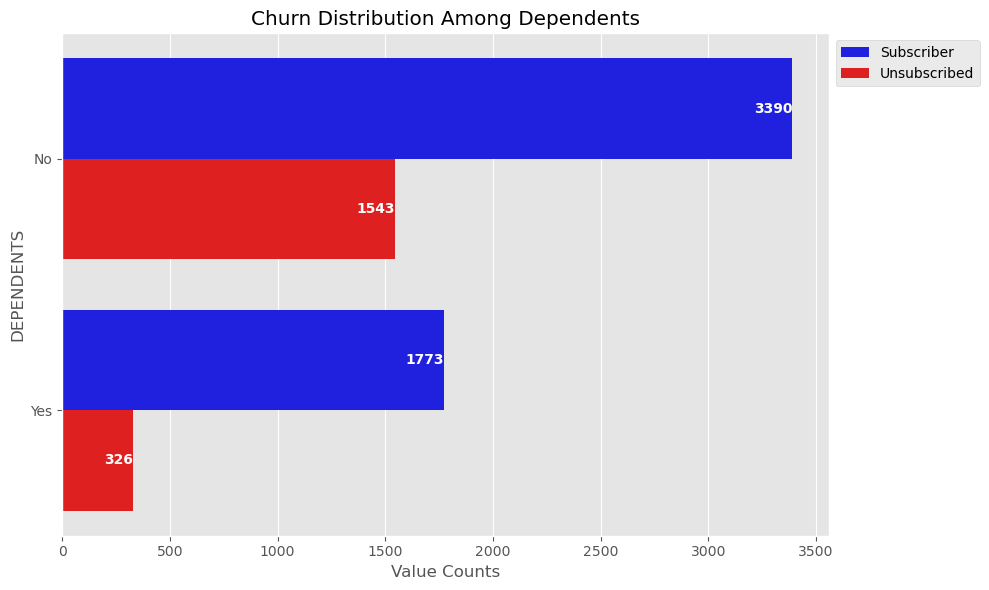


---------------
FEATURE: PHONESERVICE
---------------


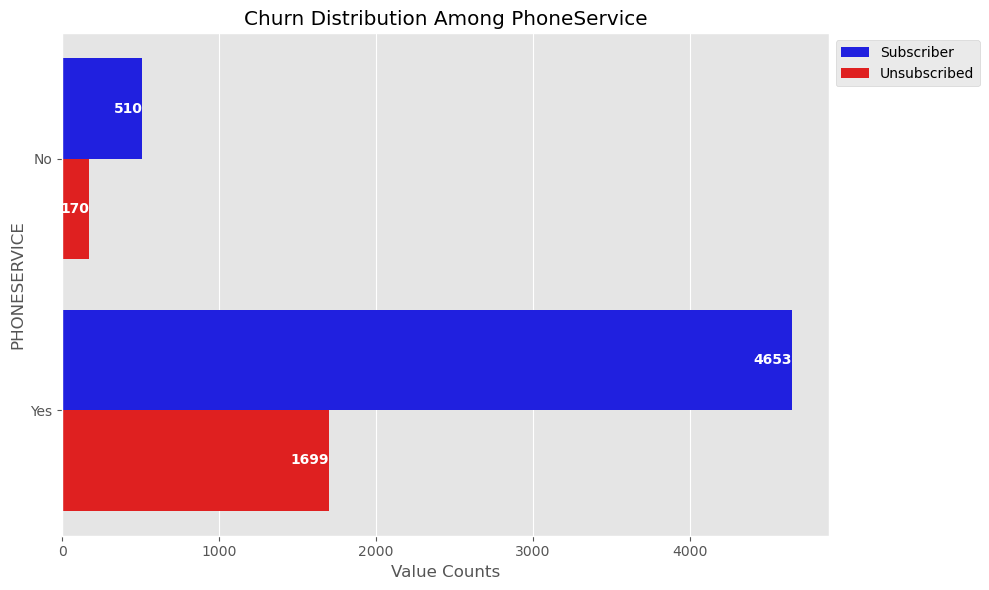


---------------
FEATURE: MULTIPLELINES
---------------


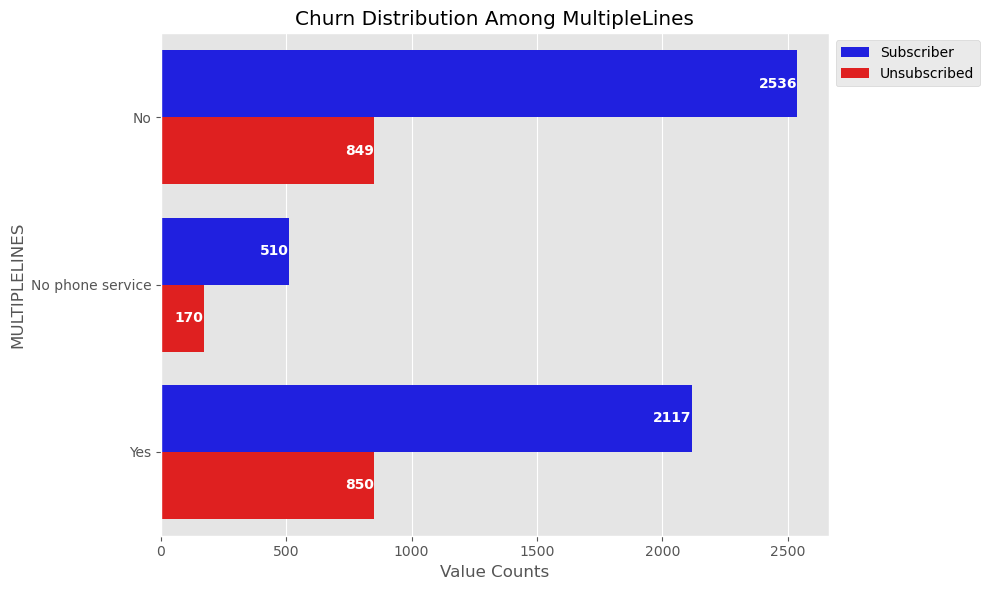


---------------
FEATURE: INTERNETSERVICE
---------------


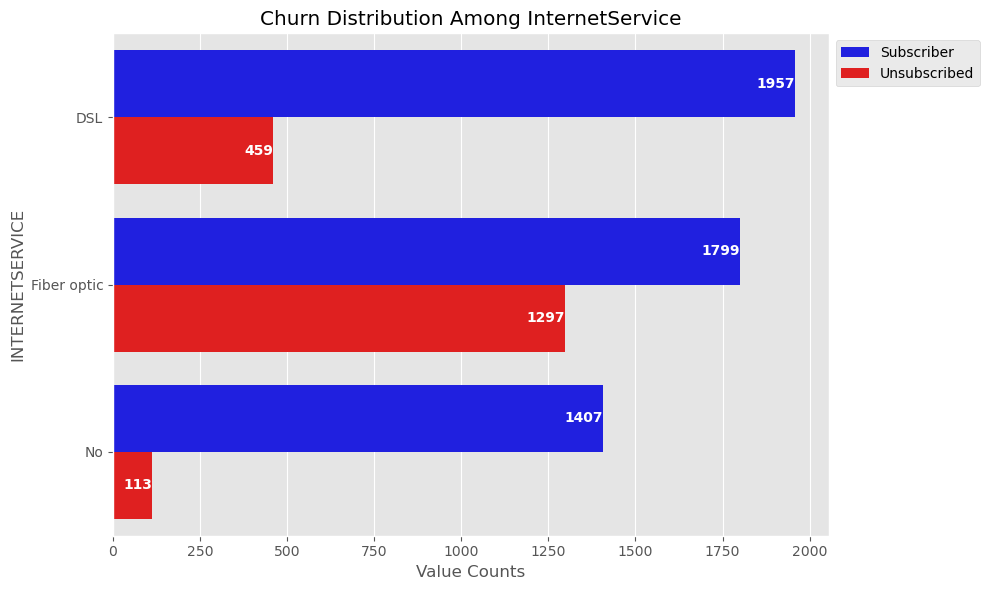


---------------
FEATURE: ONLINESECURITY
---------------


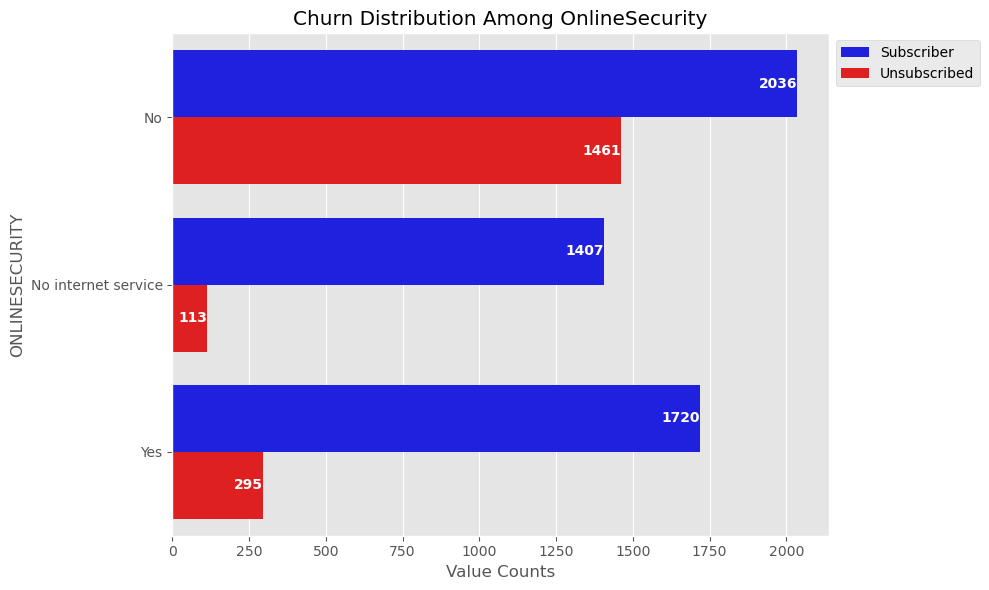


---------------
FEATURE: ONLINEBACKUP
---------------


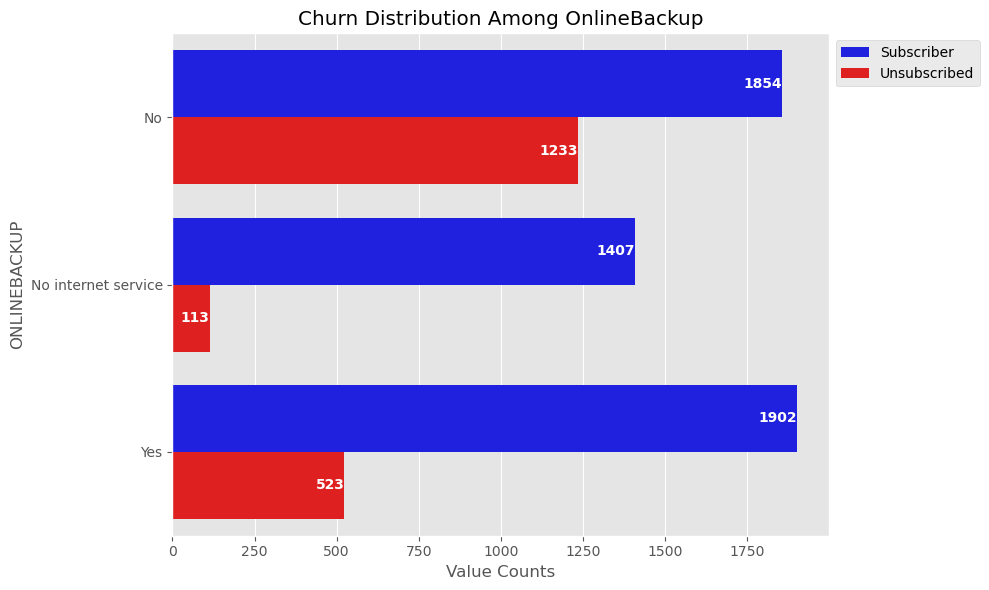


---------------
FEATURE: DEVICEPROTECTION
---------------


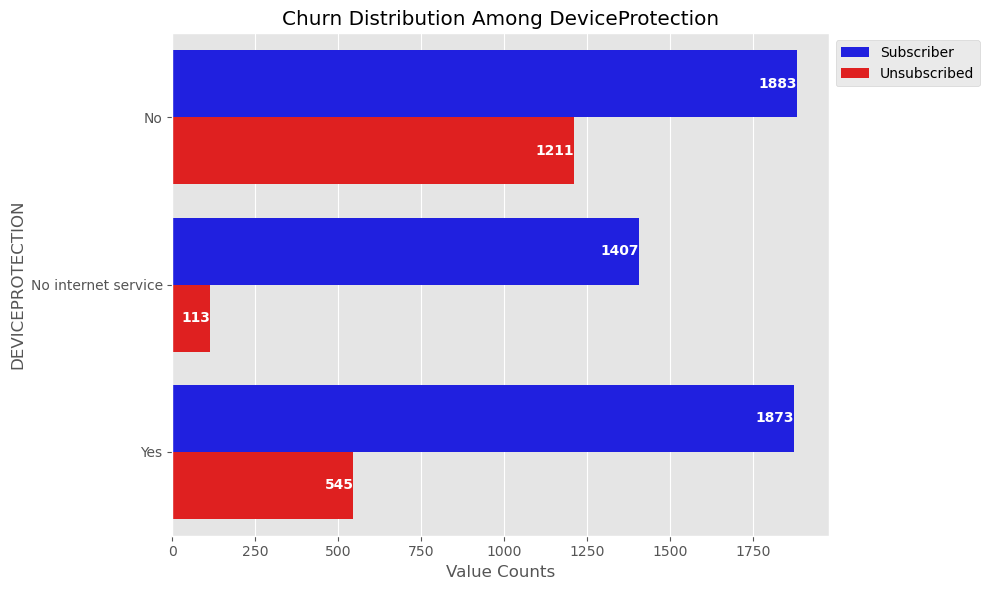


---------------
FEATURE: TECHSUPPORT
---------------


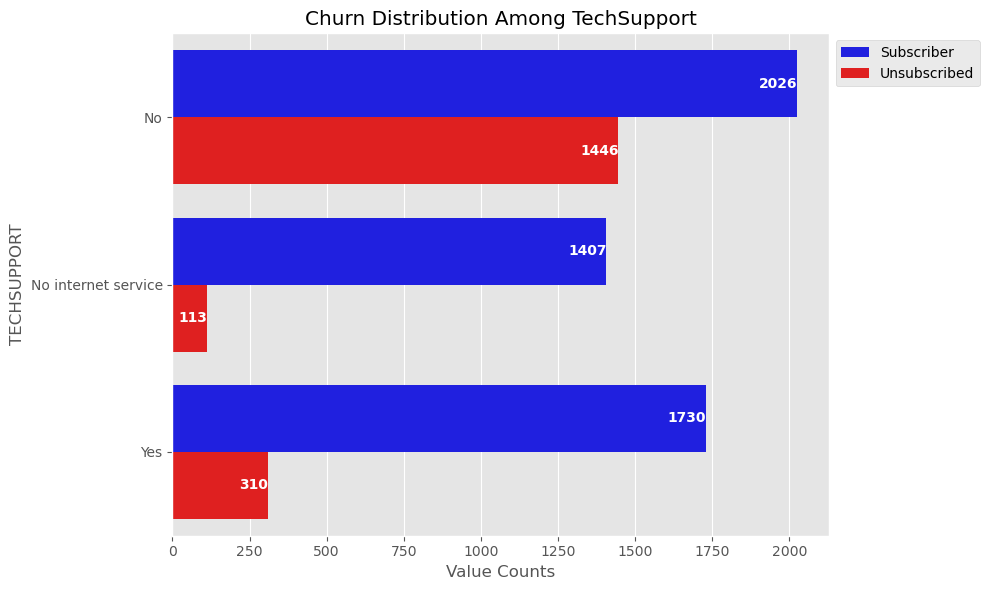


---------------
FEATURE: STREAMINGTV
---------------


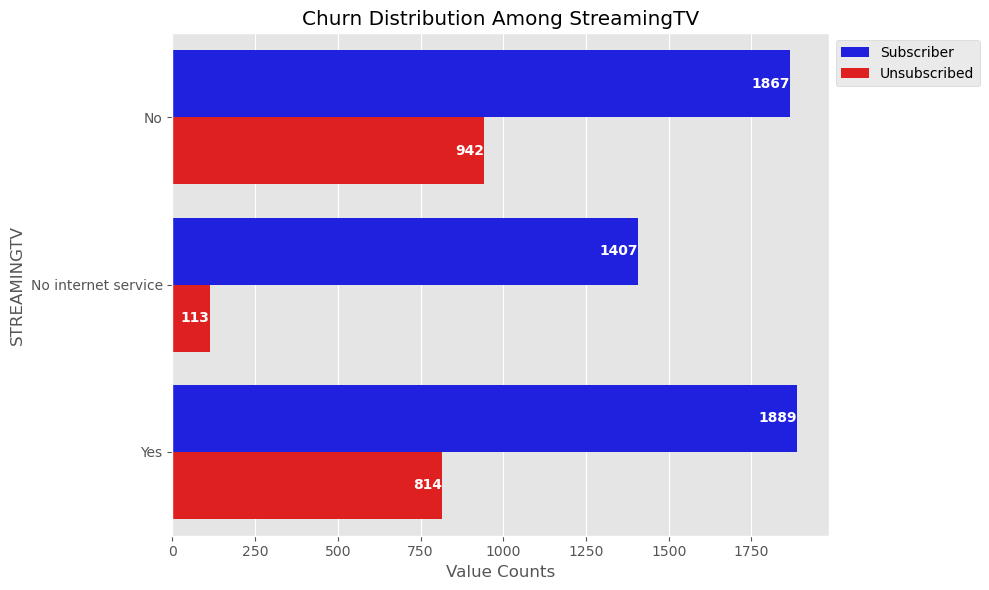


---------------
FEATURE: STREAMINGMOVIES
---------------


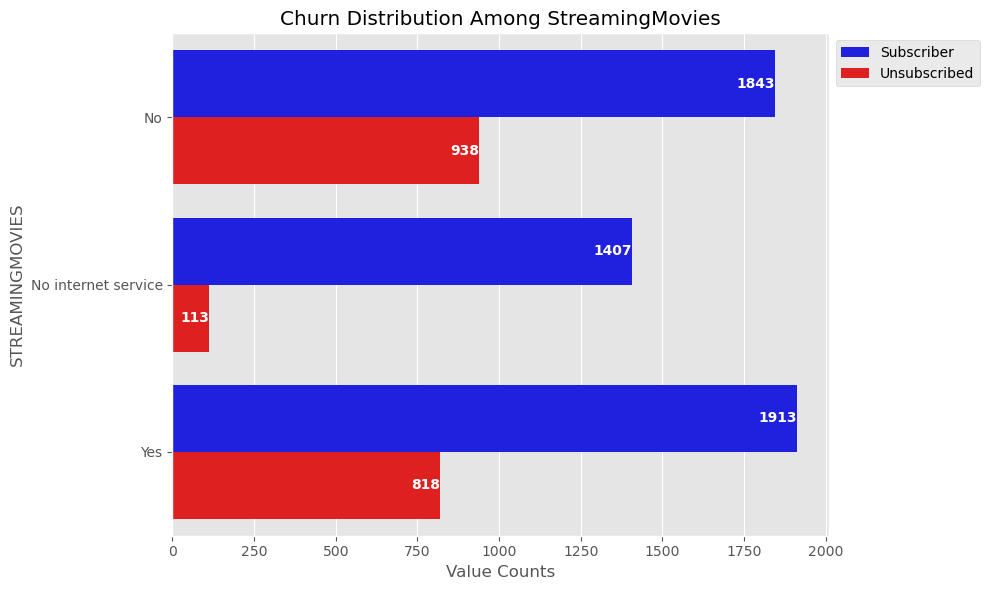


---------------
FEATURE: CONTRACT
---------------


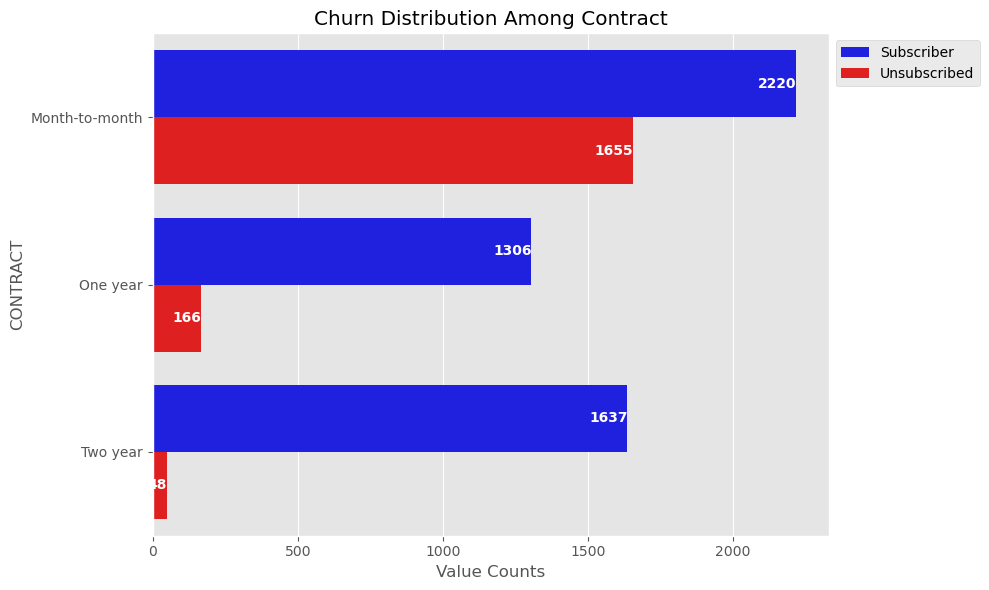


---------------
FEATURE: PAPERLESSBILLING
---------------


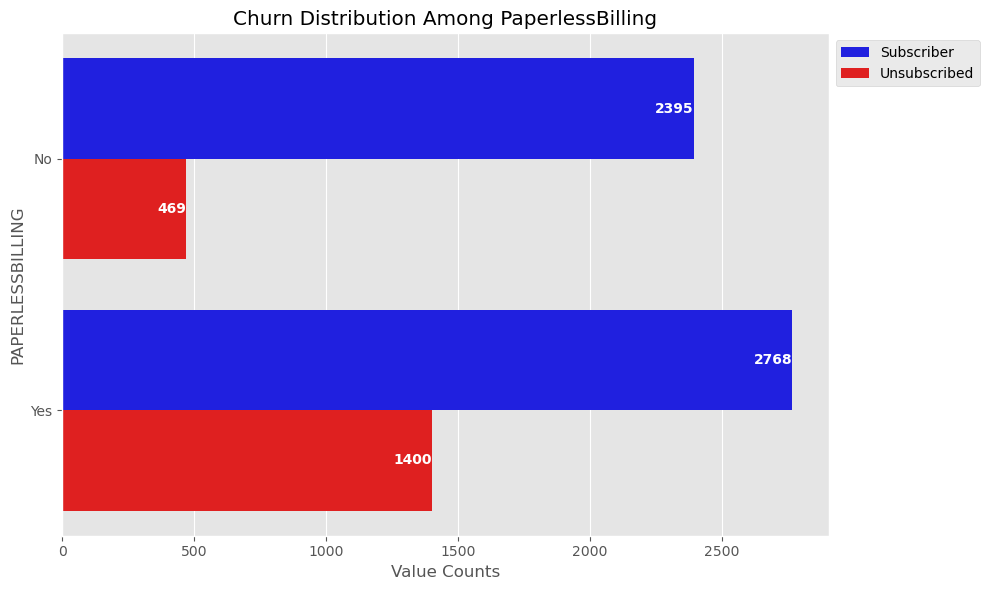


---------------
FEATURE: PAYMENTMETHOD
---------------


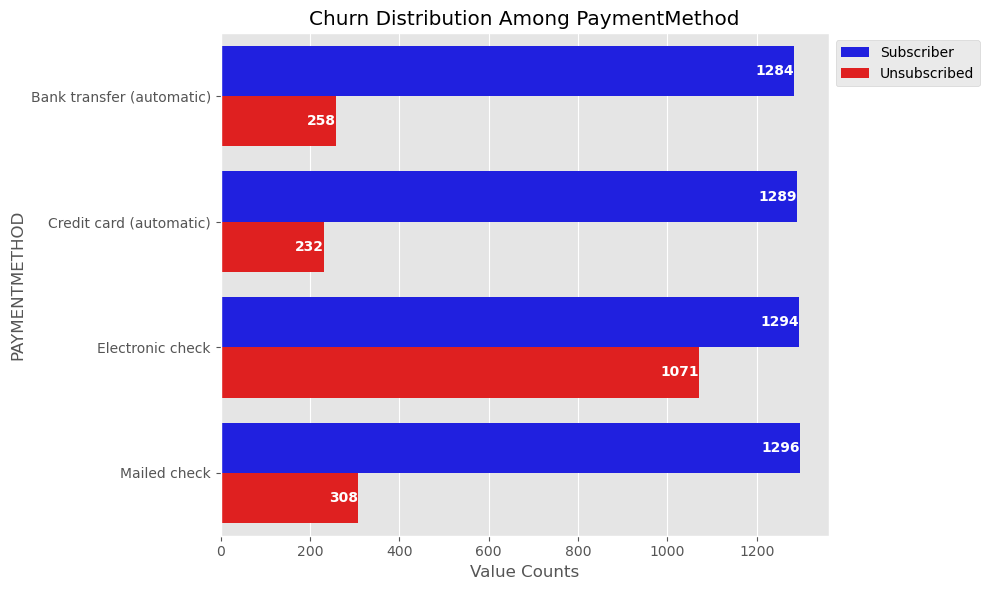

In [9]:
for column in df_nominal.columns:
    if column == 'Churn':
        break
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    grouped = df_nominal.groupby(['Churn', column]).size().rename('count').reset_index()
    fig, ax = plt.subplots(1, figsize=(10, 6))
    sns.barplot(ax=ax, data=grouped, x='count', y=column, hue='Churn',
                palette={'Subscriber': 'blue', 'Unsubscribed': 'red'})
    ax.set_title(f'Churn Distribution Among {column}')
    ax.set_xlabel('Value Counts')
    ax.set_ylabel(column.upper())
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
    for p in ax.patches:
        if p.get_width() > 0:
            ax.annotate(format(p.get_width(), '.0f'),
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='right', va='center',
                        xytext=(0, 0),  # Adjust spacing
                        textcoords='offset points', fontweight='semibold', color='white')

    plt.tight_layout()
    plt.show()


### Analytical Questions

#### Does having dependents make the customer subscribe longer?
- Answer

#### Does having a partner make the customer remain subscribed?
- Answer

#### How do senior citizens play a role in the churn rate?
- Answer

#### Do clients with multiple lines remain subscribed or churn faster?
- Answer

#### Those who have churned, how long on average do they typically subscribe for before leaving?
- Answer

#### Which customer churns faster DSL vs fiber optic
- Answer

#### Does having add-ons (online security) play a role in a lower churn rate
- Answer

####  Do specific add-ons (device protection) contribute to keeping the customer subscribed longer
- Answer

#### Do customers who subscribe to longer contracts tend to stick around longer? 
- Answer

#### Does contract period play a role in churn rate
- Answer

#### How does paperless billing play a role in the churn rate?
- Answer

#### Do specific payment methods keep customers subscribed longer like automatic payments, or vice versa
- Answer

#### Does the customer monthly payment (whether low or high) cause customers to subscribe / churn
- Answer

#### How long after total charges do customers tend to unsubscribe 
- Answer

#### Does total charges play a role in churn rate
- Answer

#### ow fast are customers churning
- Answer

#### How many customers out of the dataset have churned
- Answer

#### What kind of features can I groupby to see how churn differentiates among the groupby features 
- Answer

#### What is the biggest factor causing customers to churn
- Answer

#### What is the biggest factor causing customers to remain subscribed 
- Answer


### Script Running Smoothly

In [10]:
try:
    print('Script Executed Successfully.')
except:
    print('FAILED')

Script Executed Successfully.
